# NHM Object Character Recognition Notebook
Marko Kadic, TU Wien



In this notebook I will apply the Tesseract for OCR (Optical Character Recognition) and HTR (Handwritten Text Recognition)
of the plant images of the Vienna Natural History Museum.

Firstly I will segment the data using the following library (opencv, Tesseract):
https://github.com/tesseract-ocr/tesseract
    
After this I will use this pretrained model from the Tesseract Library (Version 5):
https://github.com/tesseract-ocr/tesseract

The results will be comapred to the ground truth data made avaliable by the NHM that can be found
in the ground_truth_1.json file.

The results will also be compared to the DAN model for HTR that can be found in this notebook:
"NHM_Handwritten_Text_Recognition.ipynb"

**0. Installing Dependencies**

In [6]:
import cv2 
import pytesseract
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import utils_ocr
from PIL import Image

**1. Preparing/Preprocessing the data**

In [7]:
# HELPER FUNCTIONS FOR IMAGE PROCESSING
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

#gray = get_grayscale(img)
#thresh = thresholding(gray)
#opening_1 = opening(gray)
#canny_1 = canny(gray)

**2. Segmenting the textual information**

In [12]:
path = "../image_samples/"

**3. The Text Recognition using Tesseract**

In [13]:
img = cv2.imread(path + 'PRNT_1.jp2')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Adding custom options
#MODES OF OPERATION chosen using the --oem option.
#0    Legacy engine only.
#1    Neural nets LSTM engine only.
#2    Legacy + LSTM engines.
#3    Default, based on what is available.
# MODES OF OPERATION usign the --psm
#  0    Orientation and script detection (OSD) only.
#  1    Automatic page segmentation with OSD.
#  2    Automatic page segmentation, but no OSD, or OCR.
#  3    Fully automatic page segmentation, but no OSD. (Default)
#  4    Assume a single column of text of variable sizes.
#  5    Assume a single uniform block of vertically aligned text.
#  6    Assume a single uniform block of text.
#  7    Treat the image as a single text line.
#  8    Treat the image as a single word.
#  9    Treat the image as a single word in a circle.
# 10    Treat the image as a single character.
# 11    Sparse text. Find as much text as possible in no particular order. !!!!!!!!!!!!!
# 12    Sparse text with OSD.
# 13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'Pe del Instituto Miguel Lillo =\nse UNIVERSIDAD NACIONAL DE TUCUMAN ‘I\nN.C... dneimia,.. PAyllitidis(L.)Sw.\nLocalidad RLQ..G.do.. SUl»P.eAlegre Morro..da Policia\n~ Observaciones: re 2 ee |\nLeg: BoRambo.AL905 ium BAP BPAGS, 52)\n_ Plan “Genera et Species Plantarum Argentinarum”’ ee\n'

**4. Exploration of results**

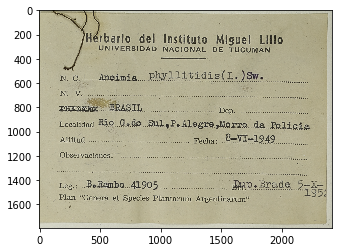

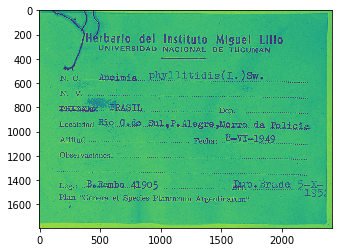

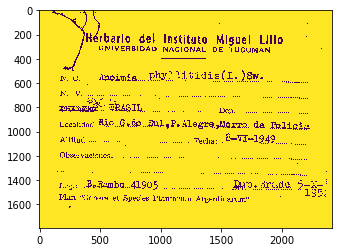

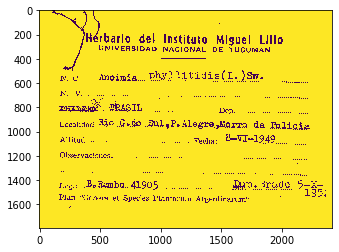

In [14]:
imgplot = plt.imshow(img)
plt.show()

gray = get_grayscale(img)
imgplot = plt.imshow(gray)
plt.show()

thresh = thresholding(gray)
imgplot = plt.imshow(thresh)
plt.show()

rm_noise = remove_noise(thresh)
imgplot = plt.imshow(rm_noise)
plt.show()

In [15]:
pytesseract.image_to_string(gray, config=custom_config)

"2. del Instituto Miguel Lillo\nf UNIVERSIDAD NACIONAL DE TUCUMAN es\nN.C .dneimia.. Phyllitidis(L.)Sw. |\nPRR ROO Las ce eee Dene ee ee\nLocalidad BLO Gedo... Sul,ePeAlegre Morro..da. Policia\n' Observaciones: Laccotice osenegaateinedt Sis oR ere Ieee See\nLeg: BeRamba:AL905. a ell Reels ore,\n3 “\n_ Plan “Genera et Species Plantarum Argentinarum”’\n"

In [16]:
pytesseract.image_to_string(thresh, config=custom_config)

"soso del Instituto Miguel Lillo\n/ UNIVERSIDAD NACIONAL DE TUCUMAN a\nN.C. ..dneimia,. Phyllitidis(L.)Sw. |\nProrat BRAS TO cece De pe scscseccsssststnneeeeeec\nLocalidad R19. Gedo. SulgPsaAlegre Morro..da Policia\n' Observaciones: sessesssesssouagusctsvsessesnscsnssensssaeanieluestenvssunenasbsssserstsisstessastusceneenessscs,\nLeg.: .BeRambdo..41905 0 ccs Burs Erade, 27k,\n. ‘\n_ Plan “Genera et Species Plantarum Argentinarum”’\n"

In [7]:
pytesseract.image_to_string(rm_noise, config=custom_config)

'ier del Instituto Miguel Lillo\nUNIVERSIDAD NACIONAL DE TUCUMAN\n\nN.C ..dneimia...pPhyllitidis(L.)Swe\n\nraces”. BRAS IO cee De pe ccsecsescsscsssssstaneecse\n\nLocalidad R19. Gedo. Sul,PeAlegre Morro da Policia\n\nAltitud eee Fecha: 8-VI-1949.\n\nLeg.: BeRambo..41905 ccs Bus Hrade. 278,\n. (4\n\nPlan “Genera et Species Plantarum Argentinarum”\n'

In [8]:
opening_ex = opening(gray)
canny_ex = canny(gray)

opening_th = opening(thresh)
canny_th = canny(thresh)

In [9]:
pytesseract.image_to_string(opening_ex, config=custom_config)


'a ae a : ]\nPee del Instituto Miguel Lillo.\nUNIVERSIDAD NACIONAL DE TUCUMAN ie\nN: ¢, _dneimia...Phyllitidis(L.)Sw.\npram PRASIL. Deptt foo. a. 2 eines ae\nLocalidad R19. Gado. SulgP. Alegre Morro.da.Palicia\nAltitud Rie cots she Meme Sa Ihiouci a2 Po See\n’ Observaciones: oe\nLeg.: .BeRamba..41905 00 cence Bap Brads. o> k=]\n_ Plan “Genera et Species Plantarum Argentinarum” ; ‘\n'

In [10]:
pytesseract.image_to_string(canny_ex, config=custom_config)


'SQ ne Senn !\nZe 3 a MEE BAK é ‘mt i\n: _ saeroario Gel Institute Miguel Lilie.\n| - ff. UNIVERSIDAD NAGIONAL DE TUCGCUMAN a\n° —_. . . ° .\nSA ~ S . Va = en 2 o ; & ka ,\nN. GC _. dveimie,.. POyLLAtidie( hs )S€o |\nice - ~ ae , .\nLocalidad 8L0..Ge@®.. Sul oP. slege HOrTra...0e, Polieia,\nAIGHUG tect Rechag SPTkelLG a\n. : ? . . . 5 , °\nObservaciones: “sapanannnneoneagansccccenseeceecesacsssseceeiafussfansnnnananchesssccsssabecssceacoosgesboneaeage\n2 ene — “ . . . & .\nLeg. .BeReimb@. AL GOS. ccs pup sBrade, 5%.\n. IP)\n. Plan “Genera et Species Plantarum Argentinarum” ‘ |\n“9 " ae\n'

In [11]:
pytesseract.image_to_string(canny_th, config=custom_config)

"[Rerbarto del Instituto Miguel. Lillo. ~ ~~\n| f UNIVERSIDAD NACIONAL DE TUCUMAN a\nN.¢, .. ducimia.. PAyLLLtidis (Tr )S¥o\nNO, WP, essssssescscnssonnsssenvaneennanesssussecunssssssssssssuesstonsentenassiaasitssesssasbgnenereseses\n| RRS RS I ccs cassscccslecesssnes TDGQs sssssesssnssssssssciensososeese\nLocalidad £3.09. Cedo. Sul oP. slegxeMoxno, da Polieia\nANHHTUG oon Pedha: SVTel949\n' Observaciones: sssenseenatenastcnsesnocnsssusetnsioieonebonecneesiaecaanuneesassnssonasonaees\nLeg.: ..BoReml@..60. 905... ccs BU. Beads. Oaks,\n]\n, d\n. Flam “Genera et Species Plantarum Argentinarum” |\n“ @\n"

In [12]:
pytesseract.image_to_string(opening_th, config=custom_config)


"a del Instituto Miguel Lillo. |\n\nUNIVERSIDAD NACIONAL DE TUCUMAN a\n\nN.C. _Aneimia,..Phyllitidis(L.)Sw.\nprament” BRASIL. Dep. esssssecssssessesseseesasenee .\nLocalidad B49..Godo. SulePsAlogre Morra.da Policia\nAltitud cenit inee Fecha: BeVTH1949\n' Observaciones: st inninininetinnininnennneinsnnnnnn\nLeg.: .BeRamba..41905 0 Burs Brad). Or ke,\n_ Plan “Genera et Species Plantarum Argentinarum”’ , ‘\n"

Greyscale + opening + thresholding seems to work best

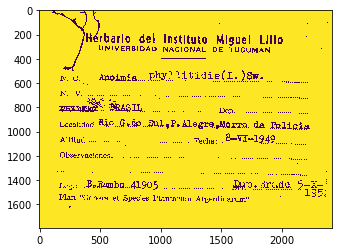

In [13]:
imgplot = plt.imshow(opening_th)
plt.show()

In [14]:
current_best = pytesseract.image_to_string(opening_th, config=custom_config)
print(current_best)

a del Instituto Miguel Lillo. |

UNIVERSIDAD NACIONAL DE TUCUMAN a

N.C. _Aneimia,..Phyllitidis(L.)Sw.
prament” BRASIL. Dep. esssssecssssessesseseesasenee .
Localidad B49..Godo. SulePsAlogre Morra.da Policia
Altitud cenit inee Fecha: BeVTH1949
' Observaciones: st inninininetinnininnennneinsnnnnnn
Leg.: .BeRamba..41905 0 Burs Brad). Or ke,
_ Plan “Genera et Species Plantarum Argentinarum”’ , ‘



## HANDWRITTEN##

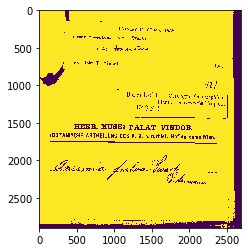

: , UNIVERSITY OF MICHIGAN ,
, Anemia tomentosa (Sav.) Swartz’
det. John T. Micke] 1961 _
ow Ip
, Burchell  Catalogus Geographious
Plantarum Brasilie Tropice.
NOQ OY
HERB. MUSEI PALAT. VINDOB.
(BOTANISCHE ABTHEILUNG DES K. K. naturhist. Hofmuseums Wien.)
a
oe eee PRT — 46). a

############


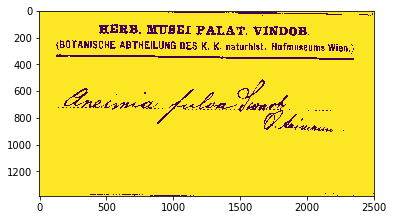

Fenn ee en
HERB. MUSEI PALAT. VINDOB.
(BOTANISCHE ABTHEILUNG DES K. K. naturhist. Hofmuseums Wien.)
a

flea ough
ee a Bo



In [18]:
img2 = cv2.imread(path + 'HND_1.jp2')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread(path + 'HND_2.jp2')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

graysc = get_grayscale(img2)
threshol = thresholding(graysc)
fin = opening(threshol)

graysc = get_grayscale(img3)
threshol = thresholding(graysc)
fin2 = opening(threshol)

imgplot = plt.imshow(fin)
plt.show()

current_hnd1 = pytesseract.image_to_string(fin, config=custom_config)
print(current_hnd1)
print("############")
imgplot = plt.imshow(fin2)
plt.show()
current_hnd2 = pytesseract.image_to_string(fin2, config=custom_config)
print(current_hnd2)


### 3. Result Visualisations ###

In [19]:
import numpy as np
import cv2 as cv
import pytesseract
from pytesseract import Output
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
from numpy import median


def get_ocr_in_json(img, tess_conf=50):
    cfg_1 = "--oem 1 --psm 11 -c textord_min_xheight=12"
    cfg_2 = "--oem 1 --psm 12 -c textord_min_xheight=12"
    data = pytesseract.image_to_data(img, output_type=Output.DICT, lang="deu", config=cfg_2)
    n_boxes = len(data['level'])
    
    json_structure = {
        "originalImage": {
            "width": img.shape[1],
            "height": img.shape[0]
        },
        "ocrTerms": []
    }
    for idx in range(0, int(n_boxes)):

        if int(float(data['conf'][idx])) > tess_conf:
            json_structure["ocrTerms"].append({"term": data['text'][idx], "x": data['left'][idx], "y": data['top'][idx],
                                               "w": data['width'][idx], "h": data['height'][idx]})

    return json_structure


def show_ocr(img, json_structure):
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    n_boxes = len(json_structure['ocrTerms'])
    xheights = []
    for idx in range(n_boxes):
        xheights.append(json_structure['ocrTerms'][idx]['h'])
    xheight = median(xheights)
    #xheight=40
    if xheight > 50 or xheight < 10:
        xheight = 40
    for idx in range(n_boxes):
        (x, y, w, h) = (json_structure['ocrTerms'][idx]['x'], json_structure['ocrTerms'][idx]['y'],
                        json_structure['ocrTerms'][idx]['w'], json_structure['ocrTerms'][idx]['h'])
        shape = [(x, y), (x + w, y + h)]
        #font = ImageFont.truetype("DejaVuSans-ExtraLight.ttf", size=h)
        font = ImageFont.truetype("DejaVuSans-ExtraLight.ttf", size=int(xheight))
        draw.rectangle(shape, outline="yellow", width=4)
        draw.text((x, y-xheight), json_structure['ocrTerms'][idx]['term'], font=font,
                  fill=('yellow'))
    return np.array(img_pil)


def print_ocr(json_structure):
    df = pd.DataFrame(json_structure['ocrTerms'])
    print(df.to_markdown())

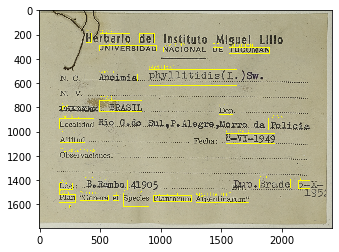

In [20]:
json_structure = get_ocr_in_json(img, 50)

img_out = show_ocr(img, json_structure)

imgplot = plt.imshow(img_out)
plt.show()

imgs = Image.fromarray(img_out, 'RGB')
imgs.show()


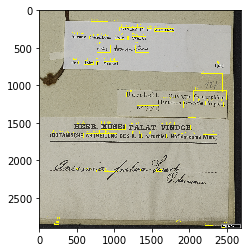

In [21]:
json_structure = get_ocr_in_json(img2, 0)

img_out = show_ocr(img2, json_structure)
imgplot = plt.imshow(img_out)
plt.show()

imgs = Image.fromarray(img_out, 'RGB')
imgs.show()